In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


print("All imports successful")

All imports successful


In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)
df = data.frame

print(df.shape)
print(df.columns)
df.head(2).T

(569, 31)
Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')


,0,1
mean radius,17.990000,20.570000
mean texture,10.380000,17.770000
mean perimeter,122.800000,132.900000
mean area,1001.000000,1326.000000
mean smoothness,0.118400,0.084740
mean compactness,0.277600,0.078640
mean concavity,0.300100,0.086900
mean concave points,0.147100,0.070170
mean symmetry,0.241900,0.181200
mean fractal dimension,0.078710,0.056670


In [3]:
# Check target distribution
df['target'].value_counts()
# 0 = malignant, 1 = benign

target
1    357
0    212
Name: count, dtype: int64

In [4]:
model = LogisticRegression(random_state=42, max_iter=4000)

features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']

target = 'target'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

print("Model is trained!")
print(f"\nX_train shape:\n{X_train.shape}")
print(f"\nX_test shape:\n{X_test.shape}")
print(f"\ny_train shape:\n{y_train.shape}")
print(f"\ny_test shape:\n{y_test.shape}")

Model is trained!

X_train shape:
(455, 30)

X_test shape:
(114, 30)

y_train shape:
(455,)

y_test shape:
(114,)


In [5]:
predictions = model.predict(X_test)

print(f"First 10 predictions: {predictions[:10]}")
print(f"First 10 actual: {y_test[:10].values}")

First 10 predictions: [1 0 0 1 1 0 0 0 1 1]
First 10 actual: [1 0 0 1 1 0 0 0 1 1]


In [6]:
cm = confusion_matrix(y_test, predictions)
print(cm)

tn, fp, fn, tp = cm.ravel()

print("\n", tn, fp, fn, tp)

[[39  4]
 [ 1 70]]

 39 4 1 70


In [7]:
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 39
False Positives: 4
False Negatives: 1
True Positives: 70


In [8]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Translation:
# accuracy = "What % of ALL predictions were correct?"
# precision = "Of positive PREDICTIONS, what % were actually positive?"
# recall = "Of actual POSITIVES, what % did we catch?"
# f1 = "Balanced score when precision and recall both matter"

# Print formatted
print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1 Score:  {f1:.3f}")

Accuracy:  0.956
Precision: 0.946
Recall:    0.986
F1 Score:  0.966


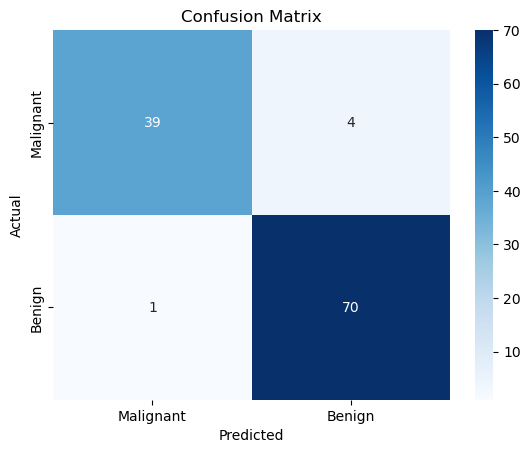

In [10]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()